# Make an illustration of the Cell and dCell/dtheta functions

import function and classes to generate data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyccl as ccl
import sys
sys.path.append('../')
from scripts.forecast import DataGenerator, make_photoz_bin_edges, plot_cl_datagen
from scripts.luminosity_functions import def_clusters_xlf, def_agn_xlf
from scripts.utils import set_mpl, path2plots
set_mpl()
%matplotlib inline



Set the cosmological parameters, and the parameters of the population of AGN and clusters

In [2]:

fiducial_params = {'Omega_c': 0.25, 'Omega_b': 0.05,
                 'h': 0.7, 'sigma8': 0.8, 'n_s': 0.96,
                 'transfer_function': 'boltzmann_camb',
                   'baryons_power_spectrum': 'nobaryons',
                   'matter_power_spectrum': 'linear'}


powspec_pars_dict_clu  = {
                      'f_fail': 0.02,
                      'sigma_0': 0.01,
                      'slim': 4.4e-14,
                      'l_min': 5,
                      'l_max': 150,
                      'log_bins': 51,
                      'fsky': 0.65,
                      'has_rsd': True,
                      'use_weighed_bias': False,
                      'density_multiplier': 1,
                      'camb_llimber': 110,
                      'use_camb': True,
                      'delta_i': 3, 
                      'xlf': def_clusters_xlf,
                      'remove_ignored_cells': True,
                      }

bin_left_edges_clu = make_photoz_bin_edges(0.4, 0.6, k =1, sigma_0 = powspec_pars_dict_clu['sigma_0'])[0:5]
print(bin_left_edges_clu)



powspec_pars_dict_agn  = {
                      'f_fail': 0.05,
                      'sigma_0': 0.05,
                      'slim': 1e-14,
                      'l_min': 10,
                      'l_max': 500,
                      'log_bins': 51,
                      'fsky': 0.65,
                      'xlf': def_agn_xlf,
                      'has_rsd': True,
                      'use_weighed_bias': False,
                      'density_multiplier': 1.3,
                      'camb_llimber': 110,
                      'use_camb': True,
                      'delta_i': 3, 
                      'remove_ignored_cells': True,
                      }
bin_left_edges_agn = make_photoz_bin_edges(0.9, 1.8, k =1, sigma_0 = powspec_pars_dict_agn['sigma_0'])[0:5]
print(bin_left_edges_agn)



[0.4    0.414  0.4281 0.4424 0.4568]
[0.9    0.995  1.0947 1.1994 1.3094]


Initiate data generator objects of Clusters

In [3]:

datagen_clu = DataGenerator(
                                 fiducial_params=fiducial_params, set_name = 'CLU')

datagen_clu.invoke(bin_left_edges=bin_left_edges_clu,
                **powspec_pars_dict_clu, plot_cell=False, plot_dndz=False);


Total Clusters sources: 8744 at fsky=0.65[26814 deg^2]
Photo-z parameters: self.sigma_0=0.01, self.f_fail=0.02
calculating CAMB...
CAMB calculation time: 0.631453275680542


calc Covariance: 100%|██████████| 10/10 [00:00<00:00, 60.83it/s]


Initiate data generator objects of AGN

In [4]:
datagen_agn = DataGenerator(
                                    fiducial_params=fiducial_params, set_name = 'AGN')  

datagen_agn.invoke(bin_left_edges=bin_left_edges_agn,
                **powspec_pars_dict_agn, plot_cell=False, plot_dndz=False);

Total AGN sources: 555142 at fsky=0.65[26814 deg^2]
Photo-z parameters: self.sigma_0=0.05, self.f_fail=0.05
calculating CAMB...
CAMB calculation time: 0.8531570434570312


calc Covariance: 100%|██████████| 10/10 [00:00<00:00, 1146.80it/s]


Calculate both Fisher matrices, it also calculates the derivatives of the data vector wrt to the cosmological parameters

In [5]:
F_agn = datagen_agn.get_Fisher_matrix()[0]
F_clu = datagen_clu.get_Fisher_matrix()[0]


Start Jacobian calculation (cosmological part): jac_step=0.0005, jac_order=2
Finished Jacobian calculation (cosmological part) in 7.94 seconds
Start Jacobian calculation (cosmological part): jac_step=0.0005, jac_order=2
Finished Jacobian calculation (cosmological part) in 8.15 seconds


Plot the derivatives of the data vector wrt to the Omega_c, the returned Jacobian is reshaped to fit all the parameter to the third axis

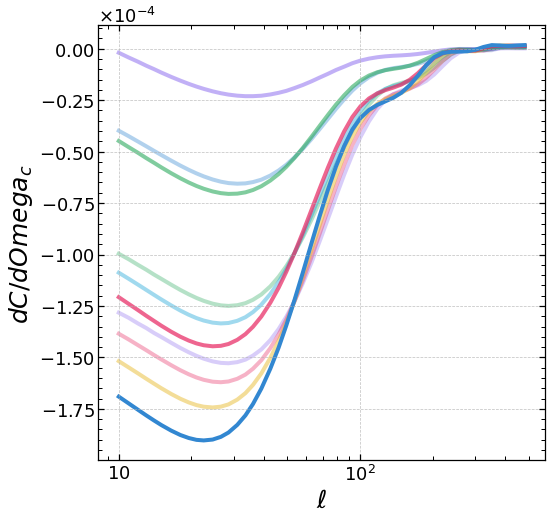

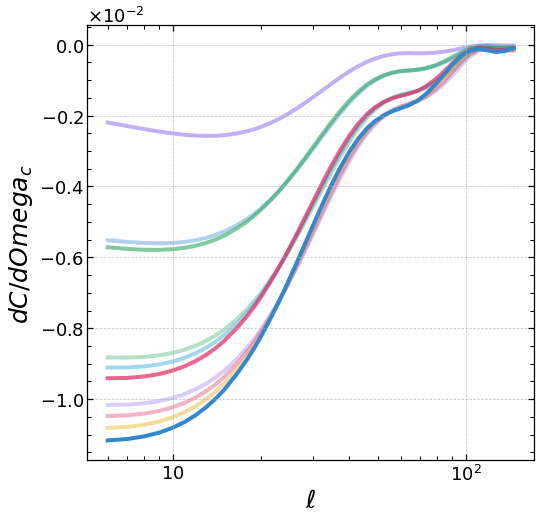

In [6]:
J_agn = F_agn.plot_derivatives_2d(idx = [0]);
J_clu = F_clu.plot_derivatives_2d(idx = [0]);

Finally, make a plot of Cell and Derivatives

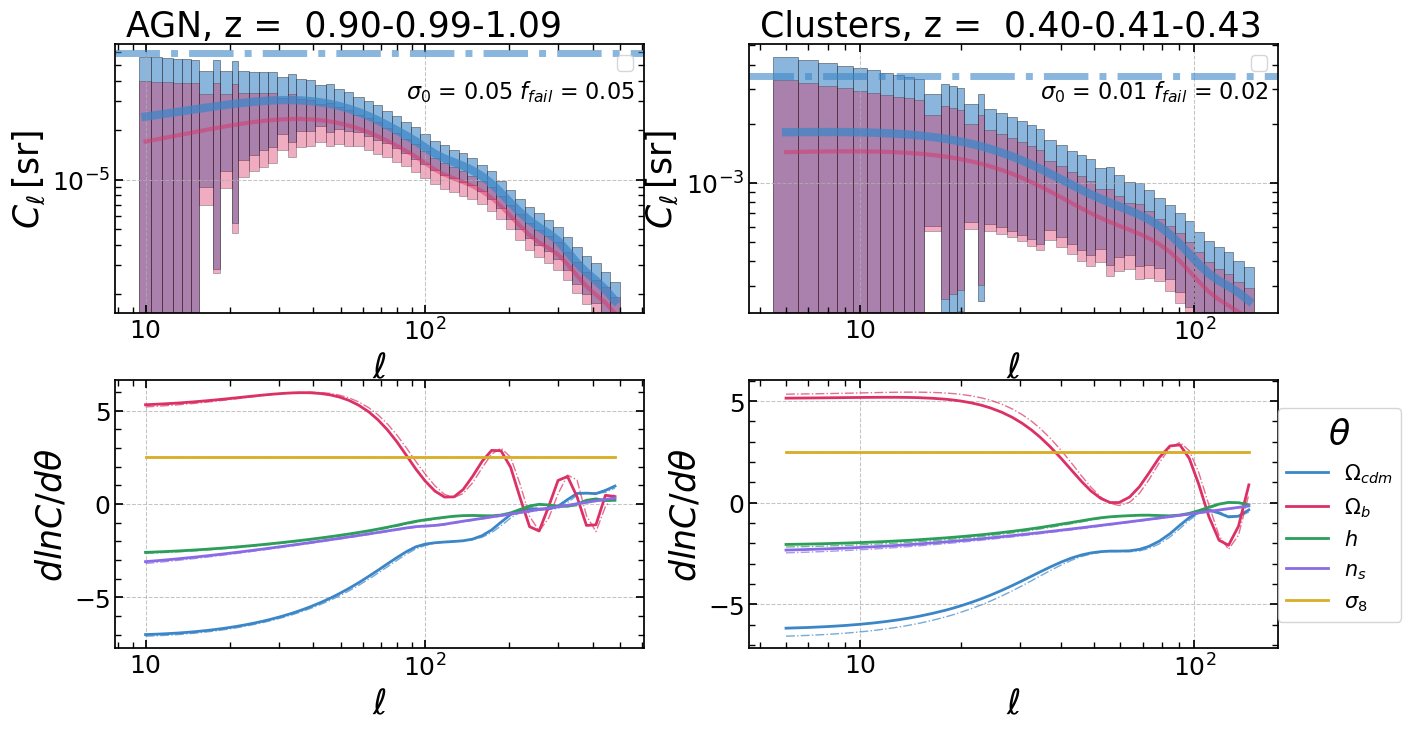

In [10]:
#set_mpl('pastel')
set_mpl(desat = 0.7)
fig = plt.figure(figsize=(15, 8))
plt.subplots_adjust(hspace=0.25)
plt.subplots_adjust(wspace=0.2)
rows, cols =  2,  2
# (rows,cols), (y,x) <- those are coordinates of an axis in subplots
ax_agn1 = plt.subplot2grid((rows, cols), (0, 0), rowspan=1, colspan=1)
ax_agn2 = plt.subplot2grid((rows, cols), (1, 0), rowspan=1, colspan=1, sharex = ax_agn1)
ax_clu1 = plt.subplot2grid((rows, cols), (0, 1), rowspan=1, colspan=1)
ax_clu2 = plt.subplot2grid((rows, cols), (1, 1), rowspan=1, colspan=1, sharex = ax_clu1)


plot_cl_datagen(datagen_agn, 0, 0, ax = ax_agn1, lw = 6,  addlabel = True, alpha = 0.6)
plot_cl_datagen(datagen_agn, 0, 1, ax = ax_agn1, lw = 3,  addlabel = True, alpha = 0.4)
#plot_cl_datagen(datagen_agn, 0, 2, ax = ax_agn1, lw = 3,  addlabel = True, alpha = 0.2)

#ax_agn1.set_title(f'AGN, {datagen_agn.bin_left_edges}')

plot_cl_datagen(datagen_clu, 0, 0, ax = ax_clu1, lw = 6,  addlabel = True, alpha = 0.6)
plot_cl_datagen(datagen_clu, 0, 1, ax = ax_clu1, lw = 3,  addlabel = True, alpha = 0.4)
#plot_cl_datagen(datagen_clu, 0, 2, ax = ax_clu1, lw = 6,  addlabel = True, alpha = 0.2)


for datagen, ax, Jac in zip([datagen_agn, datagen_clu], [ax_agn2, ax_clu2], [J_agn, J_clu]):
    for par_id, name in zip([0,1,2,3,4], ['$\Omega_{cdm}$', '$\Omega_b$', '$h$', '$n_s$', '$\sigma_8$']):
        ax.semilogx(datagen.ell_rebin, Jac[0,:, par_id]/datagen.cls_rebin[0], label = name, lw =2)
        color = ax.get_lines()[-1].get_color()

        ax.semilogx(datagen.ell_rebin, Jac[1,:, par_id]/datagen.cls_rebin[1], lw = 1, ls = '-.', color = color, alpha = 0.7)


for ax in [ax_agn2, ax_clu2]:
    ax.set_ylabel(fr'$dlnC/d\theta$')
    ax.set_xlabel('$\ell$')

ax_clu2.legend(loc = (1, 0.1), title = r'$\theta$')
ax_clu1.legend([])
ax_agn1.legend([])



for datagen, ax in zip([datagen_agn, datagen_clu], [ax_agn1, ax_clu1]):
    ax.set_title(fr' {datagen.type}, z =  {datagen.bin_left_edges[0]:.2f}-{datagen.bin_left_edges[1]:.2f}-{datagen.bin_left_edges[2]:.2f}')

for datagen, ax in zip([datagen_agn, datagen_clu], [ax_agn1, ax_clu1]):
    text = fr'$\sigma_0$ = ${datagen.sigma_0:.2f}$ $f_{{fail}}$ = {datagen.f_fail:.2f}'
    ax.text(0.55, 0.8, text, transform = ax.transAxes, fontsize = 16)

fig.savefig(path2plots+'cell.pdf')
